In [72]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import numba as nb

In [73]:
def seq_with_plotting(pixelsMatrix,mask,grayLevels = 256):
    H,W = pixelsMatrix.shape
    size = H*W
    occurencies = [0.0 for _ in range(grayLevels)]
    occurencies_for_plot = [0.0 for _ in range(grayLevels)]
    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
            if  mask[row_id][pixel_id]==1:
                occurencies[pixel]+=1
            occurencies_for_plot[pixel]+=1

    cdf = [sum(occurencies[:i+1]) for i in range(grayLevels)]
    cdfmin = next((x for x in cdf if x),-1)
    h = [round((cdf[v]-cdfmin)/(size-cdfmin) * (grayLevels-1)) for v in range(grayLevels)]

    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
            if  mask[row_id][pixel_id]==1:
                pixelsMatrix[row_id][pixel_id] = h[pixel]
            

    occurrencies_equalized = [0.0 for _ in range(grayLevels)]

    for row_id,row in enumerate(pixelsMatrix):
        for pixel_id,pixel in enumerate(row):
                occurrencies_equalized[pixel]+=1


    plt.bar(range(grayLevels),occurrencies_equalized,label = 'equalized',alpha=0.5)
    plt.bar(range(grayLevels),occurencies_for_plot,label = 'original',alpha=0.5)
    plt.legend()
    return Image.fromarray(pixelsMatrix)


In [74]:
@nb.jit(fastmath=True,nopython=True)
def generate_dummy_mask(matrix:np.ndarray,threshold = 150):
    mask = np.copy(matrix)
    return mask<threshold

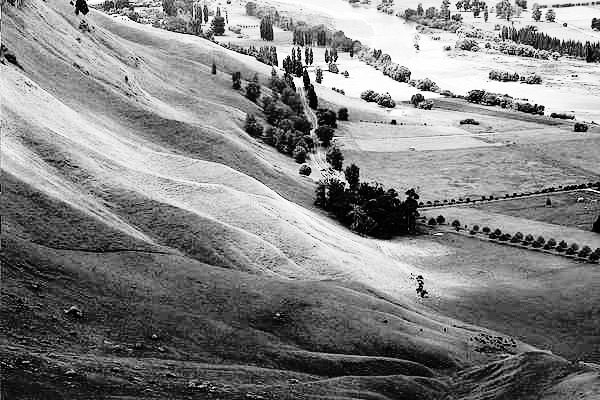

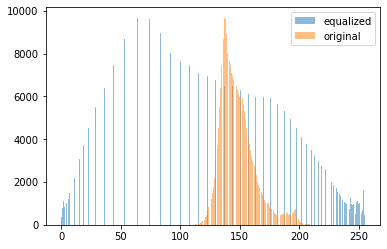

In [75]:
image = np.array(Image.open('data/600x400.png').convert('L'))
seq_with_plotting(image,np.ones(image.shape))

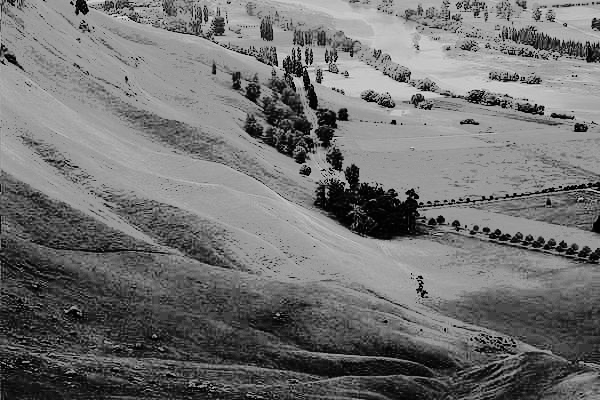

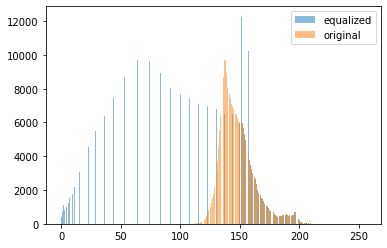

In [76]:
image = np.array(Image.open('data/600x400.png').convert('L'))
mask = np.array(generate_dummy_mask(image,150)) #maska boolowska piksel<150
seq_with_plotting(image,mask)

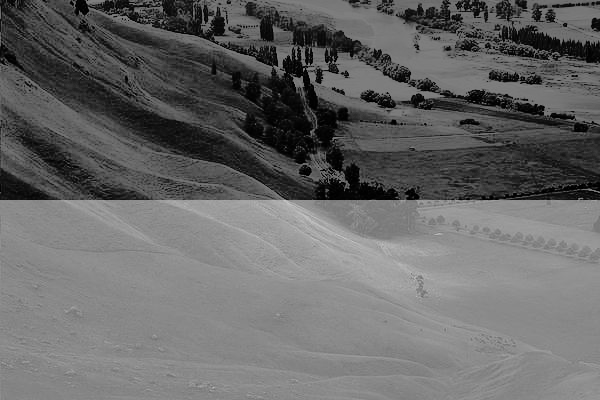

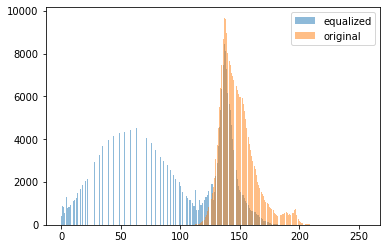

In [77]:
image = np.array(Image.open('data/600x400.png').convert('L'))
mask = np.zeros(image.shape)
for row_id,row in enumerate(mask[:len(mask)//2]):
    mask[row_id]=1
seq_with_plotting(image,mask)

In [85]:
from cuda import parallel
from seq import sequential
image = np.array(Image.open('data/2000x924.png').convert('L'))
mask = np.zeros(image.shape)

In [86]:
%%timeit -r 5 -n 10
parallel(image,mask,256)

23.7 ms ± 830 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [87]:
%%timeit -r 5 -n 10
sequential(image,mask,256)

1.94 s ± 73.9 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
